# Introduction

Compare Tsync for Kuramoto and Swarmalator here

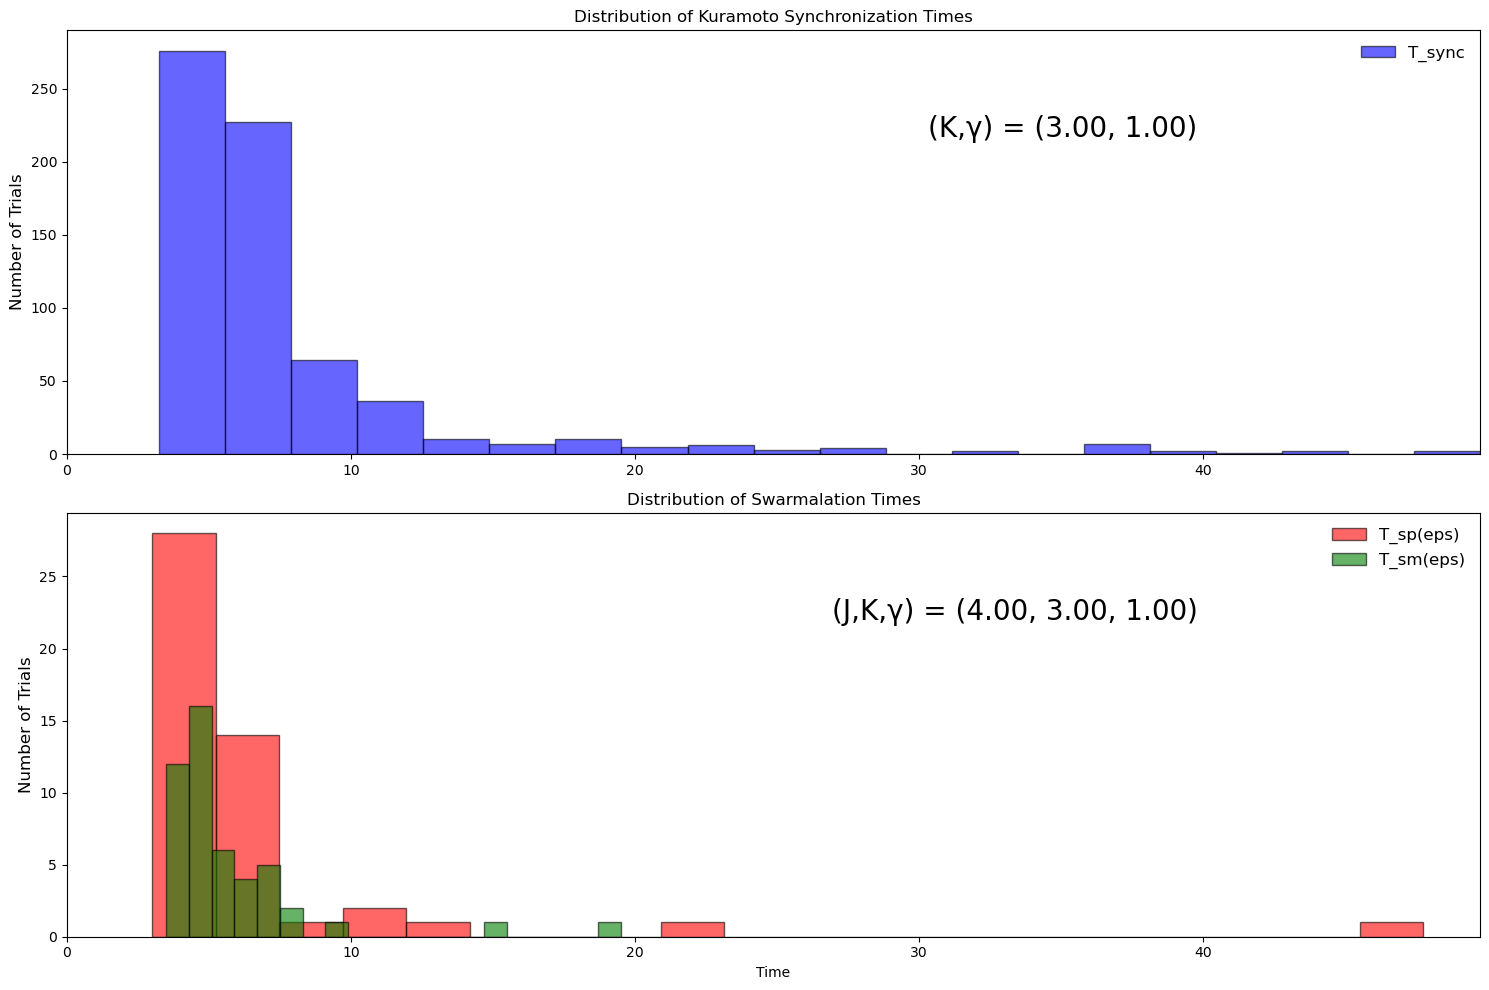

In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

def find_filename(dir_name, date_str, pattern):
    """
    Search for a filename in the directory matching the given pattern.
    """
    # List all files in the directory for the given date
    all_files = os.listdir(f"{dir_name}/{date_str}")
    # Find the filename that matches the pattern
    for filename in all_files:
        if pattern in filename:
            return filename
    raise FileNotFoundError(f"No file with pattern '{pattern}' found in directory {dir_name}/{date_str}.")

dir_name = 'data'
current_date = date.today().strftime('%Y-%m-%d')

# Automate the recovery of filenames
kuramoto_filename = find_filename(dir_name, current_date, "Tsync_kuramoto")
swarmalator_sp_filename = find_filename(dir_name, current_date, "Tsp_swarmlator")
swarmalator_sm_filename = find_filename(dir_name, current_date, "Tsm_swarmlator")

# Load data using the found filenames
kuramoto_data = np.load(f"{dir_name}/{current_date}/{kuramoto_filename}")
swarmalator_sp_data = np.load(f"{dir_name}/{current_date}/{swarmalator_sp_filename}")
swarmalator_sm_data = np.load(f"{dir_name}/{current_date}/{swarmalator_sm_filename}")


# Plotting
fig, ax = plt.subplots(2, 1, figsize=(15, 10))

# Preamble
K, gamma = 3,1
kuramoto_inset = f"(K,γ) = ({K:.2f}, {gamma:.2f})"
J,K,gamma = 4,3,1
swarmalator_inset = f"(J,K,γ) = ({J:.2f}, {K:.2f}, {gamma:.2f})"
Tmax = max(kuramoto_data.max(), swarmalator_sp_data.max(), swarmalator_sm_data.max())
ax[0].set_xlim([0, Tmax])
ax[1].set_xlim([0, Tmax])

# Left plot: Kuramoto data
ax[0].hist(kuramoto_data, bins=20, edgecolor='k', color='blue', alpha=0.6, label='T_sync')
ax[0].set_title('Distribution of Kuramoto Synchronization Times')
ax[0].set_ylabel('Number of Trials', fontsize=12)
ax[0].legend(frameon=False, fontsize='large')
kuramoto_inset = f"(K,γ) = ({3:.2f}, {1:.2f})"
ax[0].annotate(kuramoto_inset, xy=(0.8, 0.8), xycoords='axes fraction', 
               fontsize=20, ha='right', va='top', bbox=dict(boxstyle='round', facecolor='white', edgecolor='white'))


# Right plot: Swarmalator data (both T_sp and T_sm)
ax[1].hist(swarmalator_sp_data, bins=20, edgecolor='k', color='red', alpha=0.6, label='T_sp(eps)')
ax[1].hist(swarmalator_sm_data, bins=20, edgecolor='k', color='green', alpha=0.6, label='T_sm(eps)')
ax[1].set_title('Distribution of Swarmalation Times')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Number of Trials', fontsize=12)
ax[1].legend(frameon=False, fontsize='large')
ax[1].annotate(swarmalator_inset, xy=(0.8, 0.8), xycoords='axes fraction', 
               fontsize=20, ha='right', va='top', bbox=dict(boxstyle='round', facecolor='white', edgecolor='white'))

plt.tight_layout()
plt.show()
